In [10]:
import math
import folium
import numpy as np
from geopy.distance import distance

In [2]:
antenna_building_height_m = 20

antenna_coordinates = [51.225779846347535, 4.400503131269632]
min_site_coordinates = [51.227090, 4.393261]
max_site_coordinates = [51.227990333375544, 4.389441701586266]
min_site_north_coordinates = [51.22979961685109, 4.394331930457293]
min_site_south_coordinates = [51.22466615115592, 4.391886179162105]

In [3]:
map = folium.Map(location=min_site_coordinates, zoom_start=15)

antenna_marker = folium.Marker(location=antenna_coordinates, popup="antenna")
min_site_marker = folium.Marker(location=min_site_coordinates, popup="min site")
max_site_marker = folium.Marker(location=max_site_coordinates, popup="max site")
min_site_north_marker = folium.Marker(location=min_site_north_coordinates, popup="min site north")
min_site_south_marker = folium.Marker(location=min_site_south_coordinates, popup="min site south")

antenna_marker.add_to(map)
min_site_marker.add_to(map)
max_site_marker.add_to(map)
min_site_north_marker.add_to(map)
min_site_south_marker.add_to(map)

map

## Horizontal Angle 

In [4]:
def get_horizontal_angle_point_c(point_a, point_b, point_c):
    a = distance(point_b, point_c).m
    b = distance(point_a, point_c).m
    c = distance(point_a, point_b).m
    
    # Calculate the angle using the law of cosines
    angle = math.acos((a**2 + b**2 - c**2) / (2*a*b))
    
    return angle
    
horizontal_angle = get_horizontal_angle_point_c(
    min_site_north_coordinates,
    min_site_south_coordinates,
    antenna_coordinates,
)

print(f'horizontal angle: {horizontal_angle:.2f} radians')

horizontal angle: 1.01 radians


## Vertical Angle

In [5]:
import requests
import pandas as pd
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def get_elevation(coordinates):
    lat, long = coordinates
    query = ('https://api.open-elevation.com/api/v1/lookup'
             f'?locations={lat},{long}')
    r = requests.get(query, verify=False).json()
    elevation = r['results'][0]['elevation']
    return elevation

In [6]:
building_elevation_m = get_elevation(antenna_coordinates)
antenna_elevation_m = building_elevation_m + antenna_building_height_m

max_site_elevation_m = get_elevation(max_site_coordinates)
min_site_elevation_m = get_elevation(min_site_coordinates)

print(f'building elevation: {building_elevation_m:.2f} m')
print(f'antenna elevation: {antenna_elevation_m:.2f} m')
print(f'max site elevation: {max_site_elevation_m:.2f} m')
print(f'min site elevation: {min_site_elevation_m:.2f} m')

building elevation: 11.00 m
antenna elevation: 31.00 m
max site elevation: 9.00 m
min site elevation: 5.00 m


In [7]:
def get_distance_3d(coordinate_a, altitude_a, coordinate_b, c):
    distance_2d= distance(coordinate_a, coordinate_b).m
    distance_3d = np.sqrt(distance_2d**2 + (altitude_a - altitude_a)**2)
    return distance_3d

In [13]:
def get_vertical_angle_coordinate_c(
    coordinate_a, altitude_a,
    coordinate_b, altitude_b,
    coordinate_c, altitude_c
):
    a = get_distance_3d(coordinate_b, altitude_b, coordinate_c, altitude_c)
    b = get_distance_3d(coordinate_a, altitude_a, coordinate_c, altitude_c)
    c = get_distance_3d(coordinate_a, altitude_a, coordinate_b, altitude_b)
    
    # print(a, b, c)
    
    # Calculate the angle using the law of cosines
    angle = math.acos((a**2 + b**2 - c**2) / (2*a*b))
    
    return angle

In [15]:
vertical_angle = get_vertical_angle_coordinate_c(
    min_site_coordinates, min_site_elevation_m,
    max_site_coordinates, max_site_elevation_m,
    antenna_coordinates, antenna_elevation_m
)

print(f'vertical angle: {vertical_angle:.2f} radians')

810.8842274094833 526.4812964391267 284.97562691628946
vertical angle: 0.03 radians


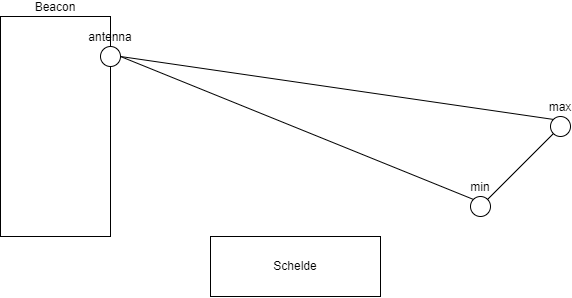